In [1]:
import bilby
import matplotlib.pyplot as plt

%matplotlib inline

In [173]:
duration = 4
sampling_frequency = 2048
#outdir = "visualising_the_results"
label = "GW150914"

injection_parameters = dict(
    chirp_mass=28.09,
    mass_ratio=0.8,
    a_1=0.,
    a_2=0.,
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=1000.0,
    theta_jn=0.4,
    phase=1.3,
    ra=1.375,
    dec=-1.2108,
    geocent_time=126259462.413,
    psi=2.659,
)

In [174]:
# specify waveform arguments
waveform_arguments = dict(
    waveform_approximant="TaylorF2",  # waveform approximant name
    reference_frequency=50.0,  # gravitational waveform reference frequency (Hz)
)

# set up the waveform generator
waveform_generator = bilby.gw.WaveformGenerator(
    sampling_frequency=sampling_frequency,
    duration=duration,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameters=injection_parameters,
    waveform_arguments=waveform_arguments,
)

12:33 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [175]:
ifos = bilby.gw.detector.InterferometerList(["H1"])
ifos.set_strain_data_from_power_spectral_densities(
    duration=duration,
    sampling_frequency=sampling_frequency,
    start_time=injection_parameters["geocent_time"] - 2,
)
_ = ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)

12:33 bilby INFO    : Injected signal in H1:
12:33 bilby INFO    :   optimal SNR = 20.10
12:33 bilby INFO    :   matched filter SNR = 19.55-2.28j
12:33 bilby INFO    :   chirp_mass = 28.09
12:33 bilby INFO    :   mass_ratio = 0.8
12:33 bilby INFO    :   a_1 = 0.0
12:33 bilby INFO    :   a_2 = 0.0
12:33 bilby INFO    :   tilt_1 = 0.5
12:33 bilby INFO    :   tilt_2 = 1.0
12:33 bilby INFO    :   phi_12 = 1.7
12:33 bilby INFO    :   phi_jl = 0.3
12:33 bilby INFO    :   luminosity_distance = 1000.0
12:33 bilby INFO    :   theta_jn = 0.4
12:33 bilby INFO    :   phase = 1.3
12:33 bilby INFO    :   ra = 1.375
12:33 bilby INFO    :   dec = -1.2108
12:33 bilby INFO    :   geocent_time = 126259462.413
12:33 bilby INFO    :   psi = 2.659


In [176]:
# first, set up all priors to be equal to a delta function at their designated value
priors = bilby.gw.prior.BBHPriorDict(injection_parameters.copy())
# then, reset the priors on the masses and luminosity distance to conduct a search over these parameters
priors['chirp_mass'] = bilby.gw.prior.UniformInComponentsChirpMass(name='chirp_mass', minimum=8.0,maximum=35.0)
priors['mass_ratio'] = bilby.gw.prior.UniformInComponentsMassRatio(name='mass_ratio', minimum=0.25, maximum=1)
#priors["luminosity_distance"] = bilby.core.prior.Uniform(
#    400, 2000, "luminosity_distance"
#)

In [177]:
# compute the likelihoods
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator
)

In [178]:
result_bis = bilby.core.sampler.run_sampler(
    likelihood=likelihood,
    priors=priors,
    conversion_function=bilby.gw.conversion.generate_all_bbh_parameters,
    sampler="dynesty",
    nlive=1000,
    injection_parameters=injection_parameters,
    outdir="prova_gw",
    label=label,
    sample="unif",
)

12:33 bilby INFO    : Running for label 'GW150914', output will be saved to 'prova_gw'
12:33 bilby INFO    : Using lal version 7.3.1
12:33 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed
12:33 bilby INFO    : Using lalsimulation version 5.2.1
12:33 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
12:33 bilby INFO    : Analysis priors:
12:33 bilby INFO    : chirp_mass=bilby.gw.prior.UniformInComponentsChirpMass(minimum=8.0, maximum=35.0, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
12

1it [00:00, ?it/s]

/usr/local/lib/python3.10/site-packages/dynesty/sampler.py:756: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
/usr/local/lib/python3.10/site-packages/dynesty/sampler.py:756: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
12:44 bilby INFO    : Written checkpoint file prova_gw/GW150914_resume.pickle
/usr/local/lib/python3.10/site-packages/dynesty/sampler.py:756: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
12:47 bilby INFO    : Written checkpoint file prova_gw/GW150914_resume.pickle
12:47 bilby INFO    : Rejection sa

12:47 bilby INFO    : Computing per-detector log likelihoods.


  0%|          | 0/2669 [00:00<?, ?it/s]

12:48 bilby INFO    : Generating sky frame parameters.


  0%|          | 0/2669 [00:00<?, ?it/s]

12:48 bilby INFO    : Computing SNRs for every sample.


  0%|          | 0/2669 [00:00<?, ?it/s]

12:49 bilby INFO    : Summary of results:
nsamples: 2669
ln_noise_evidence: -4150.547
ln_evidence: -3965.771 +/-  0.108
ln_bayes_factor: 184.776 +/-  0.108



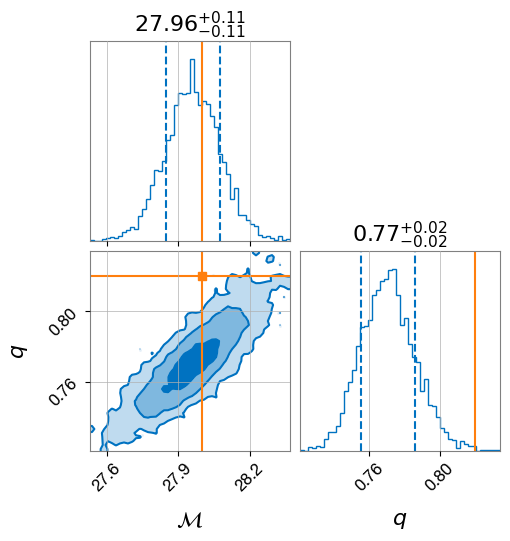

In [179]:
parameters = dict(chirp_mass=28, mass_ratio=0.82)

result_bis.plot_corner(parameters,save=False)
plt.show()
plt.close()

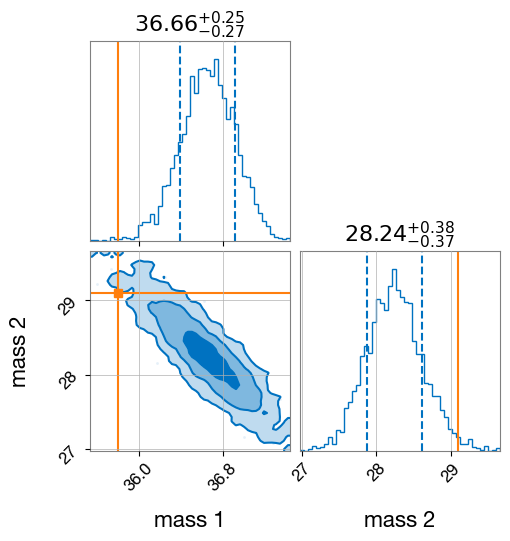

In [180]:
parameters = dict(mass_1=35.8, mass_2=29.1)
fig = result_bis.plot_corner(parameters, save=False)

12:52 bilby INFO    : Generating waveform figure for H1
12:52 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


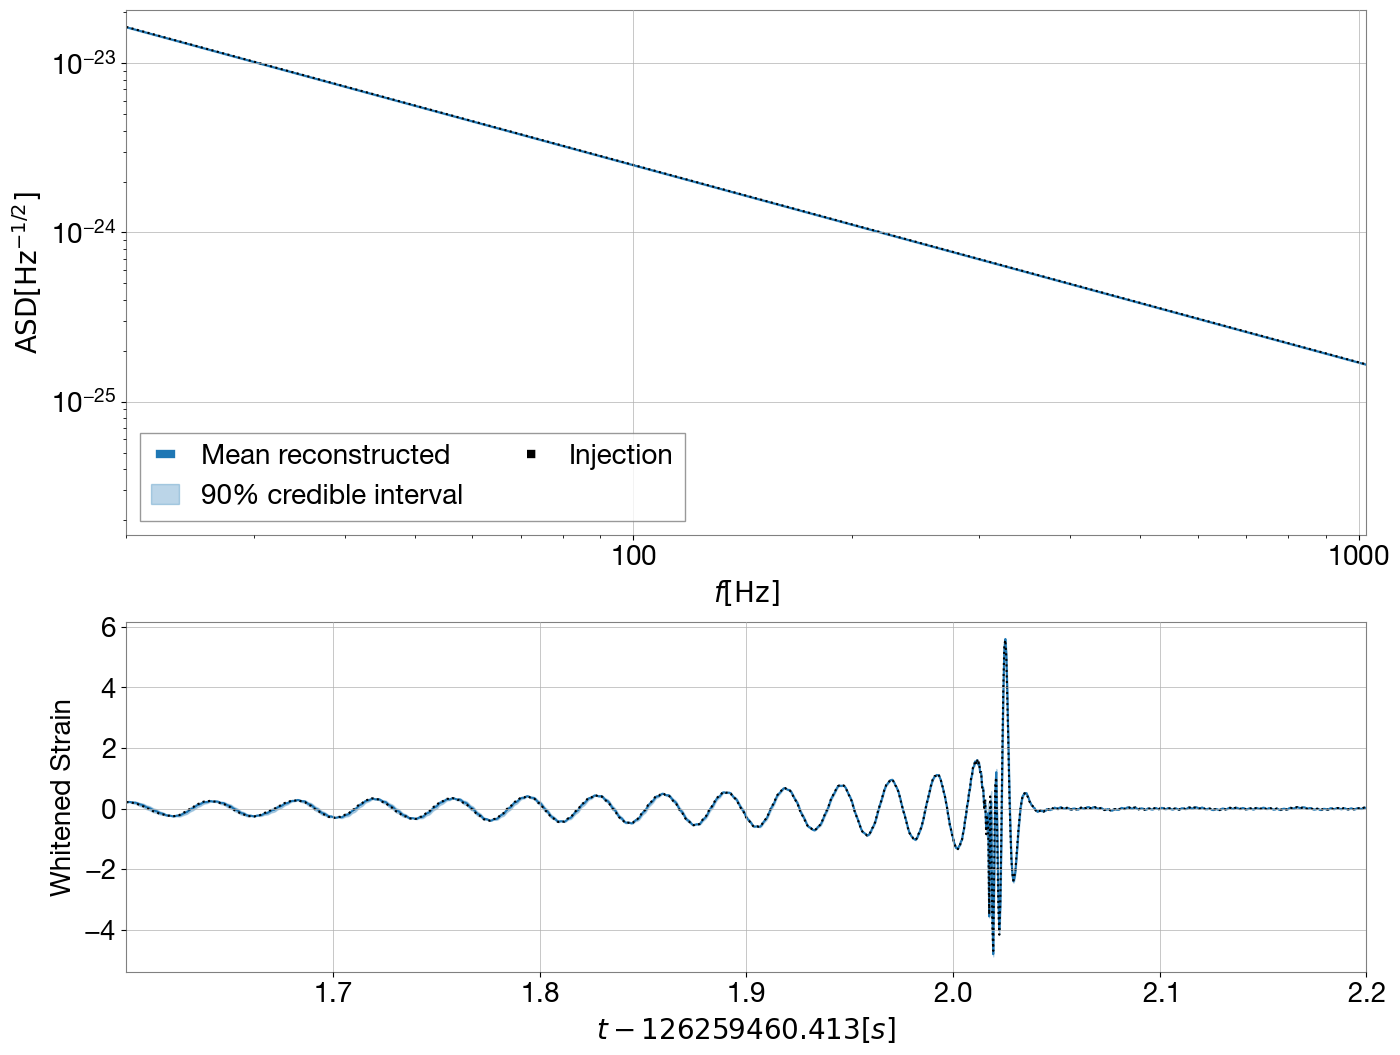

In [183]:
from bilby.gw.result import CBCResult

cbc_result = CBCResult.from_json("prova_gw/GW150914_result.json")
cbc_result.plot_interferometer_waveform_posterior(n_samples=500, save=False,interferometer='H1'
    )
pylab.plot(white_data.sample_times, white_data/100, label="Data")

plt.show()
plt.close()

In [12]:
import pycbc
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, matched_filter
from pycbc.filter import highpass
from pycbc.psd import welch
from pycbc.waveform.generator import FDomainCBCGenerator
from pycbc import types, fft
from pycbc.conversions import mass1_from_mchirp_q, mass2_from_mchirp_q
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.filter import resample_to_delta_t
from pycbc.filter import sigma
import numpy as np
array = np.loadtxt("H-H1_GWOSC_4KHZ_R1-1126257415-4096.txt")
t0=1126257415
strain_cbc = pycbc.types.timeseries.TimeSeries(array, delta_t=1/4096, epoch=t0)
strain_passed = highpass(strain_cbc, 15.0)
# strain = resample_to_delta_t(strain, 1.0/2048)
conditioned = strain_passed.crop(2, 2)

In [2]:
len(conditioned)

16760832

In [13]:
# Estimate the power spectral density

# We use 4 second samples of our time series in Welch method.
psd = conditioned.psd(4)

# Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner
psd = interpolate(psd, conditioned.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
# Since the data has been highpassed above 15 Hz, and will have low values
# below this we need to inform the function to not include frequencies
# below this frequency. 
psd = inverse_spectrum_truncation(psd, 4 * int(conditioned.sample_rate),
                                  low_frequency_cutoff=15)

Text(0, 0.5, 'Strain')

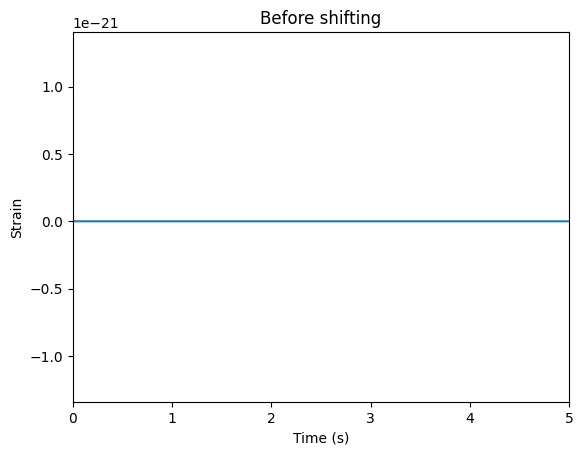

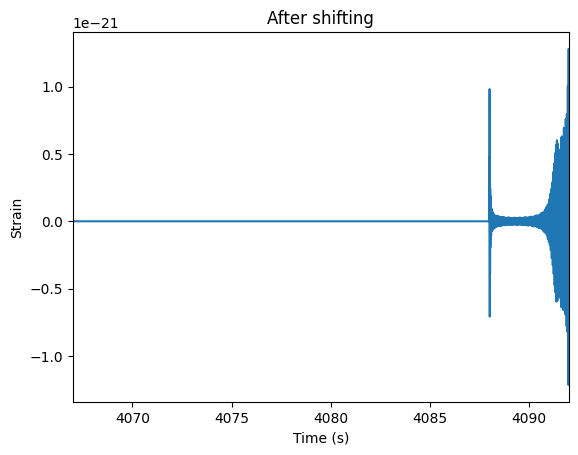

In [14]:
import pylab
from pycbc.detector import Detector
# In this case we "know" what the signal parameters are. In a search
# we would grid over the parameters and calculate the SNR time series
# for each one
det_h1 = Detector('H1')

# We'll assume equal masses, and non-rotating black holes which is within the posterior probability
# of GW150914. 
m = 36 # Solar masses
hp_tilde, hc_tilde = get_fd_waveform(approximant="TaylorF2",
                     mass1=32.57,
                     mass2=25.45,
                     a_1=0.,
                     a_2=0.,
                     distance=410.0,
                     #delta_t=conditioned.delta_t,
                         delta_f=1.0/4,
                     f_lower=20)

# We will resize the vector to match our data
#hp_tilde.resize(len(conditioned))

hp_s, hc_s = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=35.9,
                     mass2=29.2,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# We will resize the vector to match our data
hp_s.resize(len(conditioned))

declination = 1.12108
right_ascension = 1.375
polarization = 2.659
#hp_s.start_time += end_time
#hc_.start_time += end_time
# FFT it to the time-domain
tlen = int(1.0 / hp_s.delta_t / hp_tilde.delta_f)
hp_tilde.resize(tlen/2 + 1)
sp = types.TimeSeries(types.zeros(tlen), delta_t=hp_s.delta_t)
fft.ifft(hp_tilde, sp)
sp.resize(len(conditioned))
#pylab.plot(sp.sample_times, sp, label="TaylorF2 (IFFT)")
#pylab.plot(hp_s.sample_times, hp_s, label="SEOBNRv4_opt")



#signal_h1 = det_h1.project_wave(hp_tilde, hc_tilde,  right_ascension, declination, polarization)

#pp.plot(signal_h1.sample_times, signal_h1, label='TaylorF2 (IFFT)')

template = sp.cyclic_time_shift(sp.start_time)
template_s = hp_s.cyclic_time_shift(hp_s.start_time)

pylab.figure()
pylab.title('Before shifting')
pylab.plot(sp.sample_times, sp)
pylab.xlim(0,5)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')#

template = sp.cyclic_time_shift(sp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlim(4092-25,4092)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')


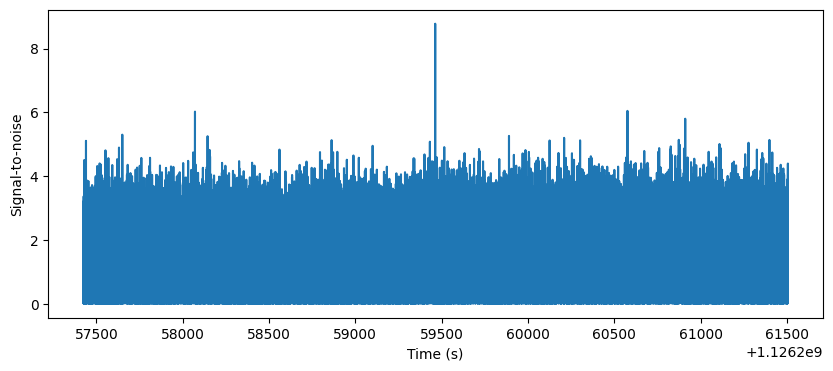

We found a signal at 1126259462.4160156s with SNR 8.774687147001545


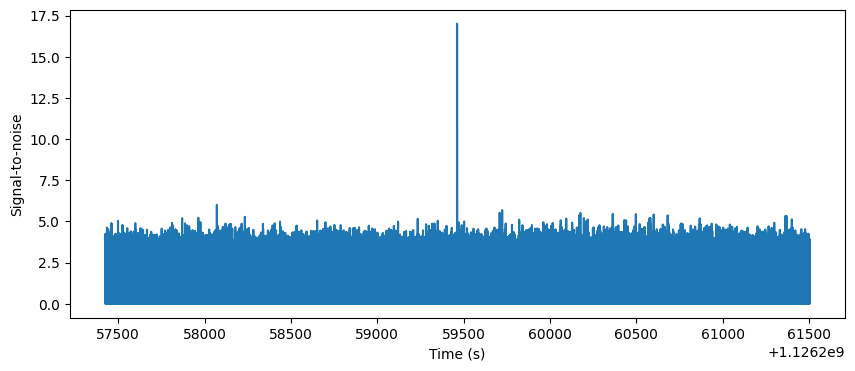

We found a signal at 1126259462.4262695s with SNR 17.010041723005482


In [15]:
snr_s = matched_filter(template_s, conditioned,
                     psd=psd, low_frequency_cutoff=20)

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seonds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for 
# so short a template). A longer signal such as from a BNS, would 
# require much more padding at the beginning of the vector.
snr = snr.crop(4 + 4, 4)
snr_s = snr_s.crop(4 + 4, 4)

# Why are we taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be 
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
# Trova gli indici degli elementi ordinati in ordine decrescente
sorted_indices = np.argsort(abs(snr))

# Prendi l'indice del secondo valore più grande
second_peak_index = sorted_indices[-2]

# Ottieni il secondo valore più grande e il tempo corrispondente
snrp_second = snr[second_peak_index]
time_second = snr.sample_times[second_peak_index]

peak_s = abs(snr_s).numpy().argmax()
snrp_s = snr_s[peak_s]
time_s = snr_s.sample_times[peak_s]

print("We found a signal at {}s with SNR {}".format(time, 
                                            abs(snrp)))
pylab.figure(figsize=[10, 4])
pylab.plot(snr_s.sample_times, abs(snr_s))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()
print("We found a signal at {}s with SNR {}".format(time_s, 
                                            abs(snrp_s)))

In [11]:
print("We found a signal at {}s with SNR {}".format(time, 
                                            abs(snrp)))

We found a signal at 1126259462.40625s with SNR 9.390881652053821


In [16]:
#time=1126259462.412
from pycbc.filter import sigma
# The time, amplitude, and phase of the SNR peak tell us how to align
# our proposed signal with the data.

# Shift the template to the peak time
dt = time - conditioned.start_time
dt_s = time_s - conditioned.start_time
aligned = template.cyclic_time_shift(dt)
aligned_s = template_s.cyclic_time_shift(dt_s)

# scale the template so that it would have SNR 1 in this data
aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0)
aligned_s /= sigma(aligned_s, psd=psd, low_frequency_cutoff=20.0)

# Scale the template amplitude and phase to the peak value
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = conditioned.start_time

# Scale the template amplitude and phase to the peak value
aligned_s = (aligned_s.to_frequencyseries() * snrp_s).to_timeseries()
aligned_s.start_time = conditioned.start_time

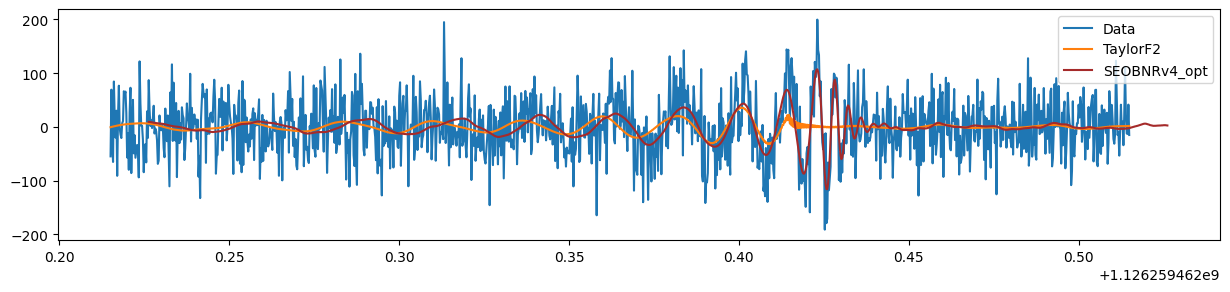

In [18]:
# We do it this way so that we can whiten both the template and the data
white_data = (conditioned.to_frequencyseries() / psd**0.5).to_timeseries()
white_template = (aligned.to_frequencyseries() / psd**0.5).to_timeseries()
white_template_s = (aligned_s.to_frequencyseries() / psd**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512)
white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)
white_template_s = white_template_s.highpass_fir(30, 512).lowpass_fir(300, 512)

# Select the time around the merger
white_data = white_data.time_slice(time-.2, time+.1)
white_template = white_template.time_slice(time-.2, time+.1)
white_template_s = white_template_s.time_slice(time_s-.2, time_s+.1)

pylab.figure(figsize=[15, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="TaylorF2")
pylab.plot(white_template_s.sample_times, white_template_s, label="SEOBNRv4_opt",color='brown')
pylab.legend()
pylab.show()

KeyboardInterrupt: 

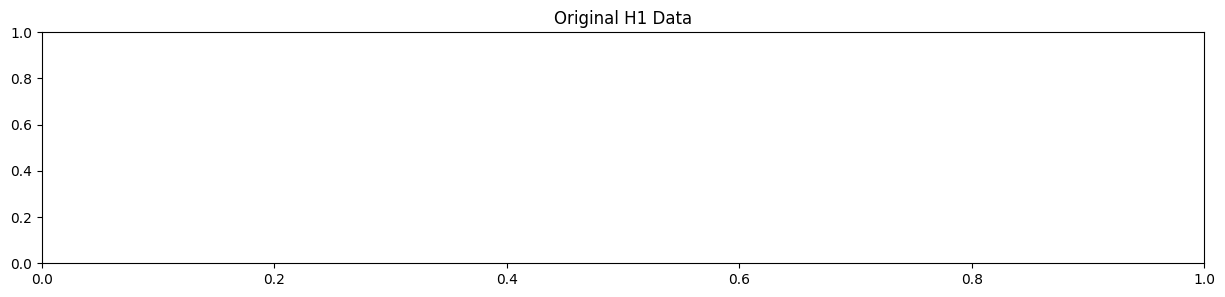

In [66]:
subtracted = conditioned - aligned

# Plot the original data and the subtracted signal data

for data, title in [(conditioned, 'Original H1 Data'),
                    (subtracted, 'Signal TaylorF2 Subtracted from H1 Data')]:

    t, f, p = data.whiten(4, 4).qtransform(.001,
                                                  logfsteps=100,
                                                  qrange=(8, 8),
                                                  frange=(20, 512))
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(time - 2, time + 1)
    pylab.show()

In [ ]:
subtracted = conditioned - aligned_s

# Plot the original data and the subtracted signal data

for data, title in [(conditioned, 'Original H1 Data'),
                    (subtracted, 'Signal SEOBNRv4_opt Subtracted from H1 Data')]:

    t, f, p = data.whiten(4, 4).qtransform(.001,
                                                  logfsteps=100,
                                                  qrange=(8, 8),
                                                  frange=(20, 512))
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(time_s - 2, time_s + 1)
    pylab.show()

In [87]:
data = np.arange(0, 128 * 4096)

# Definizione delle dimensioni dei chunk e dello spaziamento
chunk_size = 4 * 4096
spacing = 60 * 4096

# Calcolo del numero totale di chunk
num_chunks = len(data) // (chunk_size + spacing)
print(num_chunks)
# Creazione di una lista di chunk
chunks = [data[i * (chunk_size + spacing): (i + 1) * chunk_size + i * spacing] for i in range(num_chunks)]


2


In [88]:
chunks

[array([    0,     1,     2, ..., 16381, 16382, 16383]),
 array([262144, 262145, 262146, ..., 278525, 278526, 278527])]

In [129]:
from gwpy.timeseries import TimeSeries
from bilby.core.prior import Uniform
outdir = 'de'
label = 'GW150914'
logger = bilby.core.utils.logger
time_of_event = bilby.gw.utils.get_event_time(label)
print(time_of_event)
bilby.core.utils.setup_logger(outdir=outdir, label=label)

# GET DATA FROM INTERFEROMETER
interferometer_names = ['H1']  # include 'V1' for appropriate O2 events
duration = 4  # length of data segment containing the signal
post_trigger_duration = 2  # time between trigger time and end of segment
end_time = time_of_event + post_trigger_duration
start_time = end_time - duration

roll_off = 0.4  # smoothness in a tukey window, default is 0.4s
# This determines the time window used to fetch open data
psd_duration = 32 * duration
psd_start_time = start_time - psd_duration
psd_end_time = start_time

filter_freq = None  # low pass filter frequency to cut signal content above
# Nyquist frequency. The condition is 2 * filter_freq >= sampling_frequency


ifo_list = bilby.gw.detector.InterferometerList([])
for det in interferometer_names:
    logger.info("Downloading analysis data for ifo {}".format(det))
    ifo = bilby.gw.detector.get_empty_interferometer(det)
    data = TimeSeries.fetch_open_data(det, start_time, end_time)
    ifo.set_strain_data_from_gwpy_timeseries(data)
# Additional arguments you might need to pass to TimeSeries.fetch_open_data:
# - sample_rate = 4096, most data are stored by LOSC at this frequency
# there may be event-related data releases with a 16384Hz rate.
# - tag = 'CLN' for clean data; C00/C01 for raw data (different releases)
# note that for O2 events a "tag" is required to download the data.
# - channel =  {'H1': 'H1:DCS-CALIB_STRAIN_C02',
#               'L1': 'L1:DCS-CALIB_STRAIN_C02',
#               'V1': 'V1:FAKE_h_16384Hz_4R'}}
# for some events can specify channels: source data stream for LOSC data.
    logger.info("Downloading psd data for ifo {}".format(det))
    psd_data = TimeSeries.fetch_open_data(det, psd_start_time, psd_end_time)
    psd_alpha = 2 * roll_off / duration  # shape parameter of tukey window
    psd = psd_data.psd(
        fftlength=duration,
        overlap=0,
        window=("tukey", psd_alpha),
        method="median")
    ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
        frequency_array=psd.frequencies.value, psd_array=psd.value)
    ifo_list.append(ifo)

logger.info("Saving data plots to {}".format(outdir))
bilby.core.utils.check_directory_exists_and_if_not_mkdir(outdir)
ifo_list.plot_data(outdir=outdir, label=label)

# CHOOSE PRIOR FILE
# DEFAULT PRIOR FILES: GW150914.prior, binary_black_holes.prior,
# binary_neutron_stars.prior (if bns, use BNSPriorDict)
# Needs to specify path if you want to use any other prior file.
#prior = bilby.gw.prior.BBHPriorDict(filename='GW150914.prior')
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.gw.prior.UniformInComponentsChirpMass(name='chirp_mass', minimum=8.0,maximum=35.0)
prior['mass_ratio'] = bilby.gw.prior.UniformInComponentsMassRatio(name='mass_ratio', minimum=0.25, maximum=1)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-0.5, maximum=time_of_event+0.5)
prior['phase'] = 1.3
prior['a_1'] =  0.32
prior['a_2'] =  0.44
prior['tilt_1'] =  0.
prior['tilt_2'] =  0.
prior['phi_12'] =  0.
prior['phi_jl'] =  0.
prior['dec'] =  -1.2232
prior['ra'] =   2.19432
prior['theta_jn'] =  1.89694
prior['psi'] = 0.532268
prior['luminosity_distance'] = 412.066

# GENERATE WAVEFORM
sampling_frequency = 4096.  # same at which the data is stored
conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters

# OVERVIEW OF APPROXIMANTS:
# https://www.lsc-group.phys.uwm.edu/ligovirgo/cbcnote/Waveforms/Overview
waveform_arguments = {
    'waveform_approximant': 'TaylorF2',
    'reference_frequency': 50  # most sensitive frequency
}

waveform_generator = bilby.gw.WaveformGenerator(
    parameter_conversion=conversion,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments)

# CHOOSE LIKELIHOOD FUNCTION
# Time marginalisation uses FFT and can use a prior file.
# Distance marginalisation uses a look up table calculated at run time.
# Phase marginalisation is done analytically using a Bessel function.
# If prior given, used in the distance and phase marginalization.
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifo_list, waveform_generator=waveform_generator,
    priors=prior, time_marginalization=False, distance_marginalization=False,
    phase_marginalization=False)

# RUN SAMPLER
# Can use log_likelihood_ratio, rather than just the log_likelihood.
# A function can be specified in 'conversion_function' and applied
# to posterior to generate additional parameters e.g. source-frame masses.

# Implemented Samplers:
# LIST OF AVAILABLE SAMPLERS: Run -> bilby.sampler.implemented_samplers
npoints = 100  # number of live points for the nested sampler
#n_steps = 100  # min number of steps before proposing a new live point,
# defaults `ndim * 10`
sampler = 'dynesty'
# Different samplers can have different additional kwargs,
# visit https://lscsoft.docs.ligo.org/bilby/samplers.html for details.

result_ex = bilby.run_sampler(
    likelihood, prior, outdir=outdir, label=label,
    sampler=sampler, nlive=npoints, 
    #use_ratio=False,
    #walks=n_steps, n_check_point=10000, check_point_plot=True,
    conversion_function=bilby.gw.conversion.generate_all_bbh_parameters)
result_ex.plot_corner()

16:49 bilby INFO    : Downloading analysis data for ifo H1


1126259462.4


16:49 bilby INFO    : Downloading psd data for ifo H1
16:49 bilby INFO    : Saving data plots to de
16:49 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
16:49 bilby INFO    : Running for label 'GW150914', output will be saved to 'de'
16:49 bilby INFO    : Using lal version 7.3.1
16:49 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed
16:49 bilby INFO    : Using lalsimulation version 5.2.1
16:49 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed

[not

1it [00:00, ?it/s]

/usr/local/lib/python3.10/site-packages/dynesty/sampler.py:756: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
17:00 bilby INFO    : Written checkpoint file de/GW150914_resume.pickle
/usr/local/lib/python3.10/site-packages/dynesty/plotting.py:318: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
/usr/local/lib/python3.10/site-packages/dynesty/sampler.py:756: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
17:10 bilby INFO    : Written checkpoint file de/GW150914_resume.pickle
/usr/local/lib/python3.10/site-packages/dynesty/plotting.py:786: UserWarning: Attempting to set identi

Exception while calling loglikelihood function:
  params: [9.32739687e+00 7.67392602e-01 1.12625946e+09]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/dynesty/dynesty.py", line 910, in __call__
    return self.func(np.asarray(x).copy(), *self.args, **self.kwargs)
  File "/usr/local/lib/python3.10/site-packages/bilby/core/sampler/dynesty.py", line 55, in _log_likelihood_wrapper
    return _sampling_convenience_dump.likelihood.log_likelihood()
  File "/usr/local/lib/python3.10/site-packages/bilby/gw/likelihood/base.py", line 839, in log_likelihood
    return self.log_likelihood_ratio() + self.noise_log_likelihood()
  File "/usr/local/lib/python3.10/site-packages/bilby/gw/likelihood/base.py", line 394, in log_likelihood_ratio
    self.waveform_generator.frequency_domain_strain(self.parameters)
  File "/usr/local/lib/python3.10/site-packages/bilby/gw/waveform_generator.py", line 131, in frequency_domain_strain
    return self._calculate_strain(model=self.frequency_domain_source_model,
  File "/usr/local/lib/python3.10/site-packages/bilby/gw/waveform_genera

SystemExit: 130

/usr/local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3441: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [130]:
from __future__ import division, print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import bilby
from bilby.core.prior import Uniform
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

from gwpy.timeseries import TimeSeries

In [131]:
time_of_event = 1126259462.4

In [132]:
H1 = bilby.gw.detector.get_empty_interferometer("H1")


In [133]:
# Definite times in relation to the trigger time (time_of_event), duration and post_trigger_duration
post_trigger_duration = 2
duration = 4
analysis_start = time_of_event + post_trigger_duration - duration

# Use gwpy to fetch the open data
H1_analysis_data = TimeSeries.fetch_open_data(
    "H1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

In [134]:
H1.set_strain_data_from_gwpy_timeseries(H1_analysis_data)


In [135]:
psd_duration = duration * 32
psd_start_time = analysis_start - psd_duration

H1_psd_data = TimeSeries.fetch_open_data(
    "H1", psd_start_time, psd_start_time + psd_duration, sample_rate=4096, cache=True)

In [136]:
psd_alpha = 2 * H1.strain_data.roll_off / duration
H1_psd = H1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")

In [137]:
H1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=H1_psd.value)

In [138]:
H1.maximum_frequency = 1024

In [169]:
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.gw.prior.UniformInComponentsChirpMass(name='chirp_mass', minimum=8.0,maximum=35.0)
prior['mass_ratio'] = bilby.gw.prior.UniformInComponentsMassRatio(name='mass_ratio', minimum=0.25, maximum=1)
prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-0.5, maximum=time_of_event+0.5)
prior['a_1'] =  0.
prior['a_2'] =  0.
prior['tilt_1'] =  0.5
prior['tilt_2'] =  1.0
prior['phi_12'] =  1.7
prior['phi_jl'] =  0.3
prior['dec'] =  1.12108
prior['ra'] =  1.375
prior['theta_jn'] =  1.89694
prior['psi'] =  2.659
prior['luminosity_distance'] = 410

In [170]:
interferometers = [H1]

# Next create a dictionary of arguments which we pass into the LALSimulation waveform - we specify the waveform approximant here
waveform_arguments = dict(
    waveform_approximant='TaylorF2', reference_frequency=50.)#, catch_waveform_errors=True)

# Next, create a waveform_generator object. This wraps up some of the jobs of converting between parameters etc
waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

# Finally, create our likelihood, passing in what is needed to get going
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers, waveform_generator, priors=prior,
    time_marginalization=True, phase_marginalization=True, distance_marginalization=False)


18:58 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [171]:
result_short = bilby.run_sampler(
    likelihood, prior, sampler='dynesty', outdir='inter', label="GW150914",
    conversion_function=bilby.gw.conversion.generate_all_bbh_parameters,
    sample="unif", nlive=1000, dlogz=0.1  # <- Arguments are used to make things fast - not recommended for general use
)

18:58 bilby INFO    : Running for label 'GW150914', output will be saved to 'inter'
18:58 bilby INFO    : Using lal version 7.3.1
18:58 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed
18:58 bilby INFO    : Using lalsimulation version 5.2.1
18:58 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
18:58 bilby INFO    : Analysis priors:
18:58 bilby INFO    : chirp_mass=bilby.gw.prior.UniformInComponentsChirpMass(minimum=8.0, maximum=35.0, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
18:58

1it [00:00, ?it/s]

/usr/local/lib/python3.10/site-packages/dynesty/sampler.py:756: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
/usr/local/lib/python3.10/site-packages/dynesty/sampler.py:756: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
/usr/local/lib/python3.10/site-packages/dynesty/sampler.py:756: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
19:09 bilby INFO    : Written checkpoint file inter/GW150914_resume.pickle
19:11 bilby INFO    : Written checkpoint file inter/GW150914_resume.pickle
19:11 bilby INFO    : Rejection sampling

19:11 bilby INFO    : Computing per-detector log likelihoods.


  0%|          | 0/2576 [00:00<?, ?it/s]

19:12 bilby INFO    : Reconstructing marginalised parameters.


  0%|          | 0/2576 [00:00<?, ?it/s]

19:14 bilby INFO    : Generating sky frame parameters.


  0%|          | 0/2576 [00:00<?, ?it/s]

19:14 bilby INFO    : Computing SNRs for every sample.


  0%|          | 0/2576 [00:00<?, ?it/s]

19:15 bilby INFO    : Summary of results:
nsamples: 2576
ln_noise_evidence: -4386.975
ln_evidence: -4304.774 +/-  0.085
ln_bayes_factor: 82.201 +/-  0.085



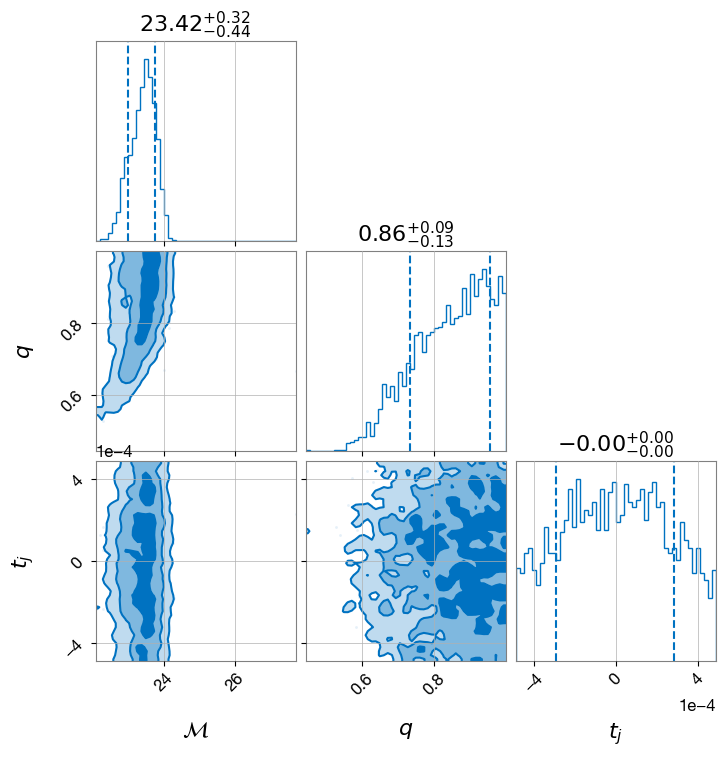

In [172]:
result_short.plot_corner()

In [ ]:
result_short.plot_corner()

In [4]:
from __future__ import division, print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import bilby
from bilby.core.prior import Uniform
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

from gwpy.timeseries import TimeSeries

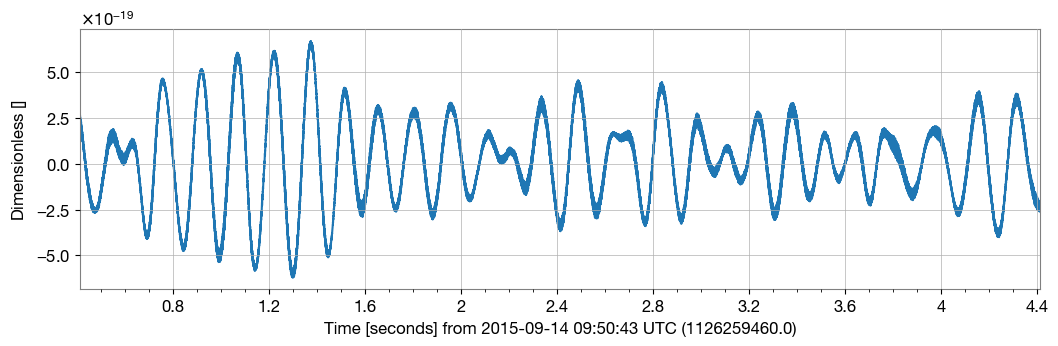

In [5]:
time_of_event = 1126259462.413
#data = array
#strain = TimeSeries(data, t0=t0, sample_rate=4096, unit='strain')

H1 = bilby.gw.detector.get_empty_interferometer("H1")

    # Definite times in relatation to the trigger time (time_of_event), duration and post_trigger_duration
post_trigger_duration = 2
duration = 4
analysis_start = time_of_event + post_trigger_duration - duration

# Use gwpy to fetch the open data
H1_analysis_data = TimeSeries.fetch_open_data(
    "H1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)
H1_analysis_data.plot()
plt.show()

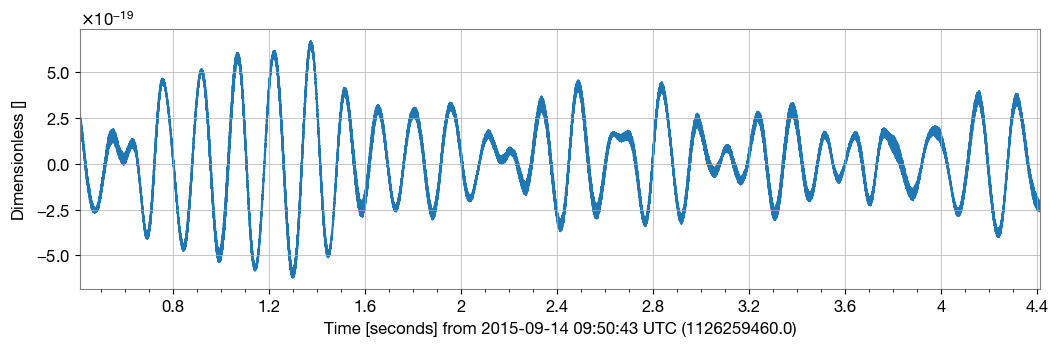

In [6]:
from gwpy.signal import filter_design
#bp = filter_design.bandpass(20, 1024, H1_analysis_data.sample_rate)
notches = [filter_design.notch(line, H1_analysis_data.sample_rate) for
           line in (60, 120, 180)]
zpk = filter_design.concatenate_zpks(*notches)
hfilt = H1_analysis_data.filter(zpk, filtfilt=True)
hfilt = hfilt.crop(*hfilt.span.contract(0))

H1.set_strain_data_from_gwpy_timeseries(hfilt)

hfilt.plot()
plt.show()

psd_duration = duration * 32
psd_start_time = analysis_start - psd_duration

H1_psd_data = TimeSeries.fetch_open_data(
    "H1", psd_start_time, psd_start_time + psd_duration, sample_rate=4096, cache=True)
#from gwpy.signal import filter_design
#bp = filter_design.bandpass(50, 250, H1_psd_data.sample_rate)
#notches = [filter_design.notch(line, H1_psd_data.sample_rate) for
#           line in (60, 120, 180)]
#zpk = filter_design.concatenate_zpks(bp, *notches)
hfilt_psd = H1_psd_data.filter(zpk, filtfilt=True)
hfilt_psd = hfilt_psd.crop(*hfilt_psd.span.contract(0))
#H1_psd_data.set_strain_data_from_gwpy_timeseries(hfilt)


In [7]:
psd_alpha = 2 * H1.strain_data.roll_off / duration
H1_psd = H1_psd_data.psd(fftlength=duration, overlap=0, window=("tukey", psd_alpha), method="median")

In [8]:
H1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
    frequency_array=H1_psd.frequencies.value, psd_array=H1_psd.value)

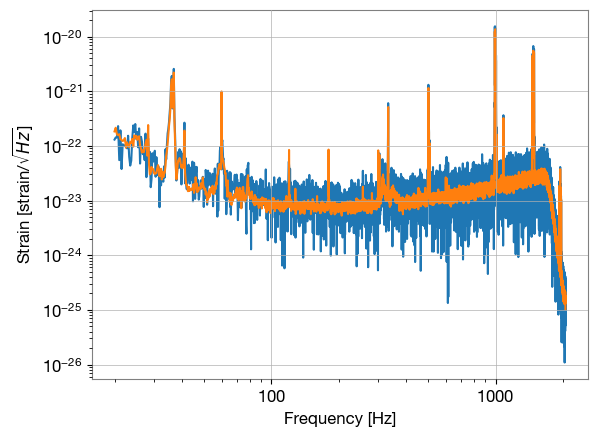

In [9]:
fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]))
ax.loglog(H1.power_spectral_density.frequency_array[idxs],
          H1.power_spectral_density.asd_array[idxs])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.show()

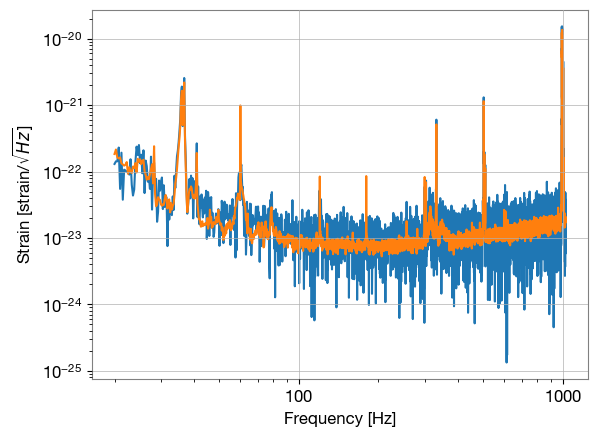

In [10]:
H1.maximum_frequency = 1024
fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]))
ax.loglog(H1.power_spectral_density.frequency_array[idxs],
          H1.power_spectral_density.asd_array[idxs])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.show()

In [11]:
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.gw.prior.UniformInComponentsChirpMass(name='chirp_mass', minimum=10.0,maximum=35.0)
prior['mass_ratio'] = bilby.gw.prior.UniformInComponentsMassRatio(name='mass_ratio', minimum=0.25,maximum=1.0)
prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-0.1, maximum=time_of_event+0.1)
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.0
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.0
prior['phi_jl'] =  0.0
prior['dec'] =  -1.2232
prior['ra'] =  2.19432
prior['theta_jn'] =  1.89694
prior['psi'] =  0.532268
prior['luminosity_distance'] = 412.066

In [12]:
# First, put our "data" created above into a list of interferometers (the order is arbitrary)
interferometers = [H1]

# Next create a dictionary of arguments which we pass into the LALSimulation waveform - we specify the waveform approximant here
waveform_arguments = dict(
    waveform_approximant='TaylorF2', reference_frequency=50., catch_waveform_errors=True)

# Next, create a waveform_generator object. This wraps up some of the jobs of converting between parameters etc
waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

# Finally, create our likelihood, passing in what is needed to get going
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers, waveform_generator, priors=prior,
    time_marginalization=True, phase_marginalization=True, distance_marginalization=False)

14:39 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [13]:
result_short = bilby.run_sampler(
    likelihood, prior, sampler='dynesty', outdir='gw', label="GW150914_definitivo",
    conversion_function=bilby.gw.conversion.generate_all_bbh_parameters,
    sample="unif", nlive=1000, dlogz=0.1  # <- Arguments are used to make things fast - not recommended for general use
)

14:39 bilby INFO    : Running for label 'GW150914_definitivo', output will be saved to 'gw'
14:39 bilby INFO    : Using lal version 7.3.1
14:39 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed
14:39 bilby INFO    : Using lalsimulation version 5.2.1
14:39 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
14:39 bilby INFO    : Analysis priors:
14:39 bilby INFO    : chirp_mass=bilby.gw.prior.UniformInComponentsChirpMass(minimum=10.0, maximum=35.0, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=No

7830it [00:00, ?it/s]

14:40 bilby INFO    : Written checkpoint file gw/GW150914_definitivo_resume.pickle


14:40 bilby INFO    : Rejection sampling nested samples to obtain 2348 posterior samples
14:40 bilby INFO    : Sampling time: 0:15:55.133622
14:40 bilby INFO    : Computing per-detector log likelihoods.


  0%|          | 0/2348 [00:00<?, ?it/s]

KeyboardInterrupt: 

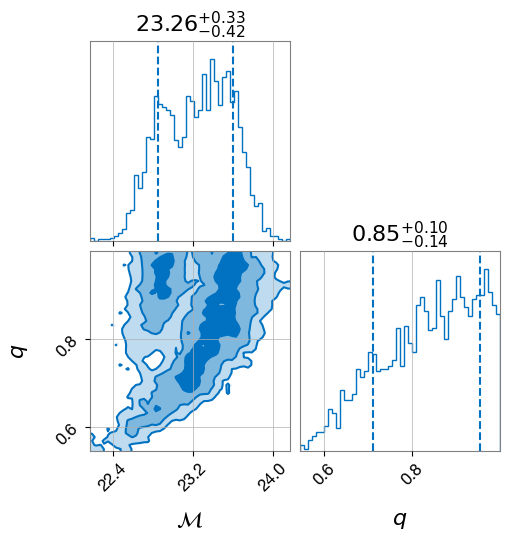

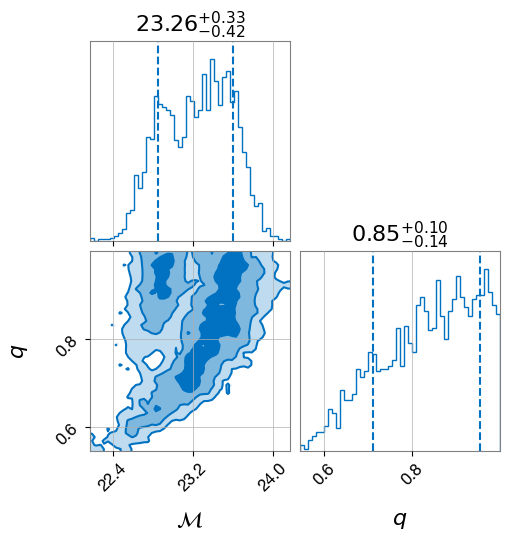

In [113]:
result_short.plot_corner(parameters=["chirp_mass", "mass_ratio"], prior=True,save=False)


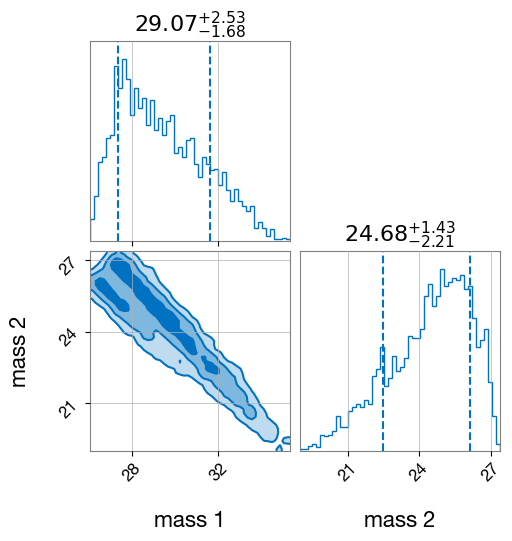

In [114]:
parameters = dict(mass_1=36.2, mass_2=29.1)
result_short.plot_corner(parameters)


In [2]:
#result_other = bilby.result.read_in_result(outdir='gw', label="GW150914_definitivo")

In [3]:
result_other.plot_waveform_posterior(n_samples=1000)


AttributeError: 'Result' object has no attribute 'plot_waveform_posterior'

In [14]:
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.gw.prior.UniformInComponentsChirpMass(name='chirp_mass', minimum=10.0,maximum=35.0)
prior['mass_ratio'] = bilby.gw.prior.UniformInComponentsMassRatio(name='mass_ratio', minimum=0.25,maximum=1.0)
#prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-0.1, maximum=time_of_event+0.1)
prior['phase']= 1.3
prior['a_1'] =  0.
prior['a_2'] =  0.
prior['tilt_1'] =  0.
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.
prior['phi_jl'] =  0.0
prior['dec'] = 1.12108
prior['ra'] =  1.375
prior['theta_jn'] =  0.4
prior['psi'] =  2.659
prior['luminosity_distance'] = 1000 
#= Uniform(name="luminosity_distance", minimum=200, maximum=2000)
# First, put our "data" created above into a list of interferometers (the order is arbitrary)
interferometers = [H1]

# Next create a dictionary of arguments which we pass into the LALSimulation waveform - we specify the waveform approximant here
waveform_arguments = dict(
    waveform_approximant='TaylorF2', reference_frequency=50., minimum_frequency=20.)#, catch_waveform_errors=True)

# Next, create a waveform_generator object. This wraps up some of the jobs of converting between parameters etc
waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

# Finally, create our likelihood, passing in what is needed to get going
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers, waveform_generator, priors=prior,
    time_marginalization=True, phase_marginalization=False, distance_marginalization=False)
result_other = bilby.run_sampler(
    likelihood, prior, sampler='dynesty', outdir='gw', label="GW150914_speriamo_bene",
    conversion_function=bilby.gw.conversion.generate_all_bbh_parameters,
    sample="unif", nlive=10000, dlogz=0.3  # <- Arguments are used to make things fast - not recommended for general use
)

14:40 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
14:40 bilby INFO    : Running for label 'GW150914_speriamo_bene', output will be saved to 'gw'
14:40 bilby INFO    : Using lal version 7.3.1
14:40 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed
14:40 bilby INFO    : Using lalsimulation version 5.2.1
14:40 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pyth

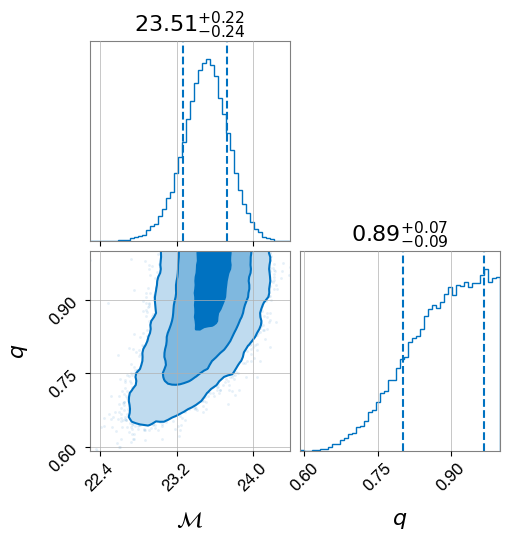

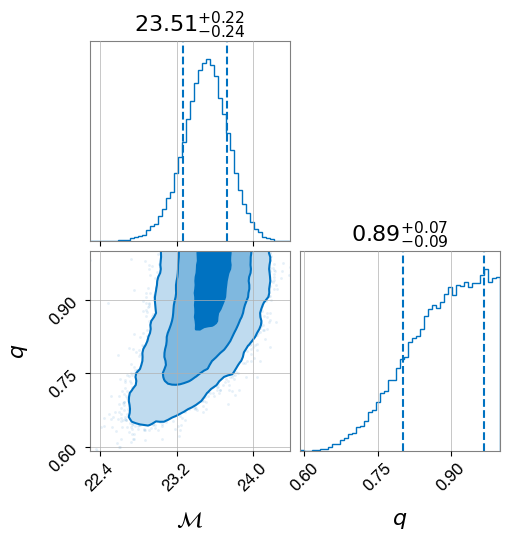

In [15]:
result_other.plot_corner(parameters=["chirp_mass", "mass_ratio"], prior=True,save=False)


In [26]:
from bilby.gw.result import CBCResult

time_of_event = 1126259462.413

    # Definite times in relatation to the trigger time (time_of_event), duration and post_trigger_duration
post_trigger_duration = 2
duration = 4
analysis_start = time_of_event + post_trigger_duration - duration
analysis_end = analysis_start + duration

cbc_result = CBCResult.from_json("gw/GW150914_speriamo_bene_result.json")
#cbc_result.plot_interferometer_waveform_posterior(n_samples=500, save=False,interferometer='H1')
cbc_result.plot_waveform_posterior(n_samples=500,interferometers=['H1'],start_time=analysis_start,end_time=analysis_end)
#pylab.plot(white_data.sample_times, white_data/100, label="Data")

#plt.show()
#plt.close()

14:55 bilby INFO    : Generating waveform figure for H1
14:55 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [27]:
cbc_result

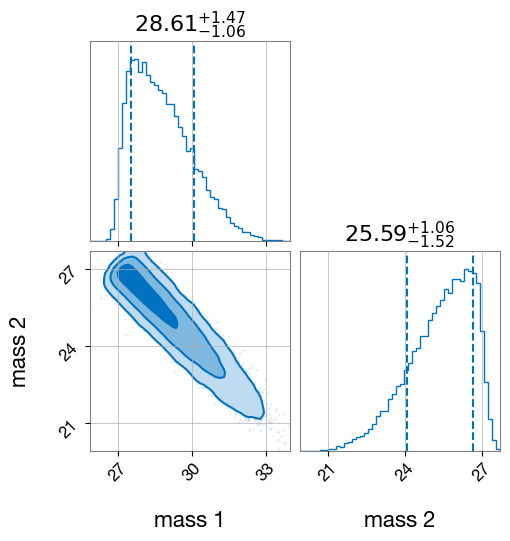

In [34]:
parameters = dict(mass_1=36.2, mass_2=29.1)
result_other.plot_corner(parameters)

In [ ]:
result_other.plot_waveform_posterior(n_samples=1000)


In [38]:
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.gw.prior.UniformInComponentsChirpMass(name='chirp_mass', minimum=10.0,maximum=35.0)
prior['mass_ratio'] = bilby.gw.prior.UniformInComponentsMassRatio(name='mass_ratio', minimum=0.25,maximum=1.0)
prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-0.5, maximum=time_of_event+0.5)
#prior['phase']= 1.3
prior['a_1'] =  0.
prior['a_2'] =  0.
prior['tilt_1'] =  0.
prior['tilt_2'] =  0.0
prior['phi_12'] =  0.
prior['phi_jl'] =  0.0
prior['dec'] = 1.12108
prior['ra'] =  1.375
prior['theta_jn'] =  0.4
prior['psi'] =  2.659
prior['luminosity_distance'] = 410 
#= Uniform(name="luminosity_distance", minimum=200, maximum=2000)
# First, put our "data" created above into a list of interferometers (the order is arbitrary)
interferometers = [H1]

# Next create a dictionary of arguments which we pass into the LALSimulation waveform - we specify the waveform approximant here
waveform_arguments = dict(
    waveform_approximant='TaylorF2', reference_frequency=50., minimum_frequency=20.)#, catch_waveform_errors=True)

# Next, create a waveform_generator object. This wraps up some of the jobs of converting between parameters etc
waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

# Finally, create our likelihood, passing in what is needed to get going
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers, waveform_generator, priors=prior,
    time_marginalization=True, phase_marginalization=False, distance_marginalization=False)
result_multi = bilby.run_sampler(
    likelihood, prior, sampler='dynesty', outdir='gw', label="GW150914_multi_b",
    conversion_function=bilby.gw.conversion.generate_all_bbh_parameters,
    #sample="multi", 
    nlive=1000, dlogz=0.1  # <- Arguments are used to make things fast - not recommended for general use
)

12:22 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
12:22 bilby INFO    : Running for label 'GW150914_multi_b', output will be saved to 'gw'
12:22 bilby INFO    : Using lal version 7.3.1
12:22 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed
12:22 bilby INFO    : Using lalsimulation version 5.2.1
12:22 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.10

3192it [00:00, ?it/s]

/usr/local/lib/python3.10/site-packages/dynesty/sampler.py:756: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
12:31 bilby INFO    : Written checkpoint file gw/GW150914_multi_b_resume.pickle
/usr/local/lib/python3.10/site-packages/dynesty/sampler.py:756: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
12:36 bilby INFO    : Run interrupted by signal 2: checkpoint and exit on 130
12:36 bilby INFO    : Written checkpoint file gw/GW150914_multi_b_resume.pickle


AssertionError: 

In [ ]:
result_multi.plot_corner(parameters=["chirp_mass", "mass_ratio"], prior=True,save=False)


In [ ]:
parameters = dict(mass_1=36.2, mass_2=29.1)
result_other.plot_corner(parameters)

In [133]:
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.gw.prior.UniformInComponentsChirpMass(name='chirp_mass', minimum=10.0,maximum=35.0)
prior['mass_ratio'] = bilby.gw.prior.UniformInComponentsMassRatio(name='mass_ratio', minimum=0.25,maximum=1.0)
#prior['phase'] = Uniform(name="phase", minimum=0, maximum=2*np.pi)
prior['geocent_time'] = Uniform(name="geocent_time", minimum=time_of_event-1, maximum=time_of_event+1)
prior['phase']= 1.3
prior['a_1'] =  0.0
prior['a_2'] =  0.0
prior['tilt_1'] =  0.5
prior['tilt_2'] =  1.0
prior['phi_12'] =  1.7
prior['phi_jl'] =  0.3
prior['dec'] = -1.2108
prior['ra'] =  1.375
prior['theta_jn'] =  0.4
prior['psi'] =  2.659
prior['luminosity_distance'] = Uniform(name="luminosity_distance", minimum=200, maximum=2000)
# First, put our "data" created above into a list of interferometers (the order is arbitrary)
interferometers = [H1]

# Next create a dictionary of arguments which we pass into the LALSimulation waveform - we specify the waveform approximant here
waveform_arguments = dict(
    waveform_approximant='TaylorF2', reference_frequency=50., catch_waveform_errors=True)

# Next, create a waveform_generator object. This wraps up some of the jobs of converting between parameters etc
waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

# Finally, create our likelihood, passing in what is needed to get going
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers, waveform_generator, priors=prior,
    time_marginalization=True, phase_marginalization=False, distance_marginalization=True)
result_other = bilby.run_sampler(
    likelihood, prior, sampler='dynesty', outdir='gw', label="GW150914_provvisorio",
    conversion_function=bilby.gw.conversion.generate_all_bbh_parameters,
    sample="unif", nlive=100, dlogz=0.1  # <- Arguments are used to make things fast - not recommended for general use
)

19:25 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
19:25 bilby INFO    : Loaded distance marginalisation lookup table from .distance_marginalization_lookup.npz.
19:25 bilby INFO    : Running for label 'GW150914_provvisorio', output will be saved to 'gw'
19:25 bilby INFO    : Using lal version 7.3.1
19:25 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modifications committed
19:25 bilby INFO    : Using lalsimulation version 5.2.1
19:25 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.19;Id: 84d780c102cf51ea1fdf7a1cbf0a626a5eca0d0a;;Builder: Duncan Macleod <duncan.macleod@ligo.org>;Repository status: CLEAN: All modific

1it [00:00, ?it/s]

/usr/local/lib/python3.10/site-packages/dynesty/sampler.py:756: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
/usr/local/lib/python3.10/site-packages/dynesty/sampler.py:756: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'
19:29 bilby INFO    : Written checkpoint file gw/GW150914_provvisorio_resume.pickle
19:29 bilby INFO    : Rejection sampling nested samples to obtain 325 posterior samples
19:29 bilby INFO    : Sampling time: 0:03:43.420434


19:29 bilby INFO    : Computing per-detector log likelihoods.


  0%|          | 0/325 [00:00<?, ?it/s]

19:29 bilby INFO    : Reconstructing marginalised parameters.


  0%|          | 0/325 [00:00<?, ?it/s]

19:30 bilby INFO    : Generating sky frame parameters.


  0%|          | 0/325 [00:00<?, ?it/s]

19:30 bilby INFO    : Computing SNRs for every sample.


  0%|          | 0/325 [00:00<?, ?it/s]

19:30 bilby INFO    : Summary of results:
nsamples: 325
ln_noise_evidence: -4386.394
ln_evidence: -4304.327 +/-  0.300
ln_bayes_factor: 82.067 +/-  0.300



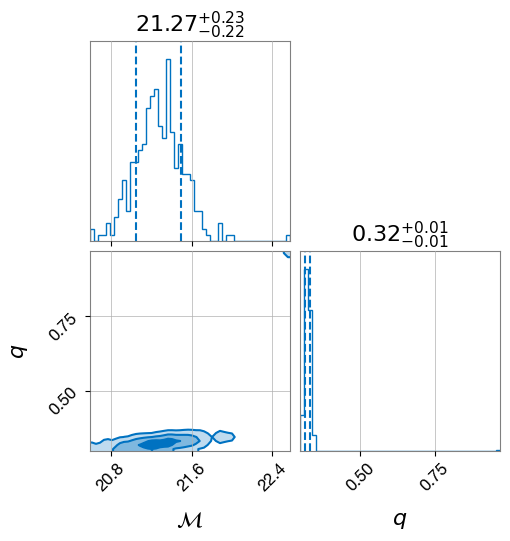

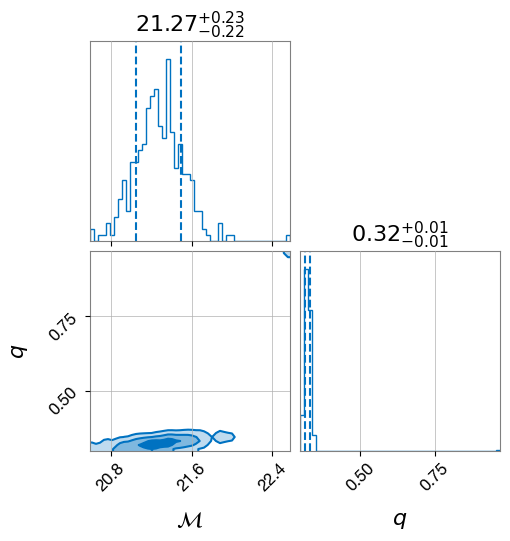

In [134]:
result_other.plot_corner(parameters=["chirp_mass", "mass_ratio"], prior=True,save=False)
